In [69]:
import tensorflow as tf
import tensorflow_datasets as tfdf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten ,InputLayer,MaxPool2D,Dense,BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

Data Preparation:
Data Loading

In [18]:
dataset=tfdf.load('malaria',as_supervised=True,shuffle_files=True,split=["train"])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incompleteBPTVUU/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [70]:
len(list(dataset[0].take(2).as_numpy_iterator()))

2

In [71]:
## Genrating rain,test,validate Dataset.
TRAIN_RATIO=0.8
VAL_RATIO=0.1
TEST_RATIO=0.1


def train_test_split(dataset,TRAIN_RATIO,VAL_RATIO,TEST_RATIO):
  DATASET_SIZE=len(dataset)

  train_dataset=dataset.take(int(TRAIN_RATIO*DATASET_SIZE))

  val_tmp_dataset=dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
  val_dataset=val_tmp_dataset.take(int(VAL_RATIO*DATASET_SIZE))

  test_dataset=val_tmp_dataset.skip(int(VAL_RATIO*DATASET_SIZE))
  return train_dataset,val_dataset,test_dataset

train_dataset,val_dataset,test_dataset=train_test_split(dataset[0],TRAIN_RATIO,VAL_RATIO,TEST_RATIO)
print("TRAIN_DATA",list(train_dataset.take(1).as_numpy_iterator()))
print("VAL_DATA",list(val_dataset.take(1).as_numpy_iterator()))
print("TEST_DATA",list(test_dataset.take(1).as_numpy_iterator()))

TRAIN_DATA [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 0)]
VAL_DATA [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
    

Dataset Visulization:

In [72]:
for i in train_dataset.take(2):
  print(tf.rank(i[0].numpy()))
  print(i[1].numpy())


tf.Tensor(3, shape=(), dtype=int32)
1
tf.Tensor(3, shape=(), dtype=int32)
1


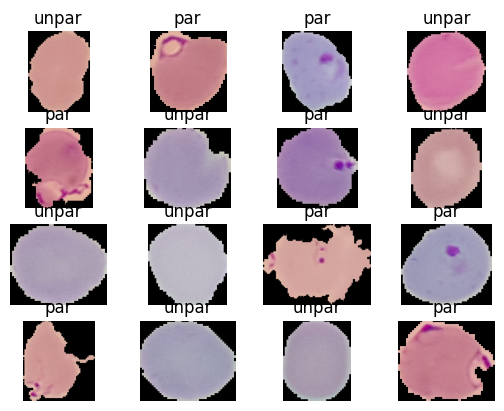

In [73]:
feature=["par","unpar"]
for i,(image,label) in enumerate(train_dataset.take(16)):
  ax=plt.subplot(4,4,i+1)
  plt.imshow(image)
  plt.title(feature[label])
  plt.axis('off')

Data Preprocessing:


In [74]:
IMG_SIZE=224

def img_resize_rescale(image,label):
  return tf.image.resize(image,(IMG_SIZE,IMG_SIZE))/255.0,label

In [75]:
train_dataset=train_dataset.map(img_resize_rescale)
val_dataset=val_dataset.map(img_resize_rescale)
test_dataset=test_dataset.map(img_resize_rescale)

In [61]:
for image,label in train_dataset.take(2):
  print(image,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0

In [76]:
train_dataset=train_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [77]:
val_dataset=val_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [78]:
test_dataset=test_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

Model Creation

In [82]:
model=Sequential([
    InputLayer(input_shape=(224,224,3)),
    Conv2D(filters=6,kernel_size=3,strides=(1,1),padding='valid',activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    Conv2D(filters=16,kernel_size=3,strides=(1,1),padding='valid',activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    Flatten(),
    Dense(1000,activation="relu"),
    Dense(100,activation="relu"),
    Dense(1,activation="sigmoid"),
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_2 (Bat  (None, 222, 222, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_3 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                      

In [83]:
model.compile(optimizer= Adam(learning_rate=0.01),
              loss=BinaryCrossentropy(),
              metrics="accuracy")

In [85]:
history=model.fit(train_dataset,validation_data=val_dataset,epochs=5,verbose=1)

Epoch 1/5
689/689 [==============================] - 1629s 2s/step - loss: 0.7040 - accuracy: 0.4976 - val_loss: 0.6934 - val_accuracy: 0.4947
Epoch 2/5
689/689 [==============================] - 1482s 2s/step - loss: 0.6934 - accuracy: 0.4982 - val_loss: 0.6935 - val_accuracy: 0.4962
Epoch 3/5
689/689 [==============================] - 1451s 2s/step - loss: 0.6947 - accuracy: 0.4981 - val_loss: 0.6934 - val_accuracy: 0.4966
Epoch 4/5
689/689 [==============================] - 1484s 2s/step - loss: 0.7845 - accuracy: 0.4968 - val_loss: 0.6935 - val_accuracy: 0.4933
Epoch 5/5
689/689 [==============================] - 1438s 2s/step - loss: 0.6935 - accuracy: 0.4975 - val_loss: 0.6934 - val_accuracy: 0.4958


Model Evaluation and Testing

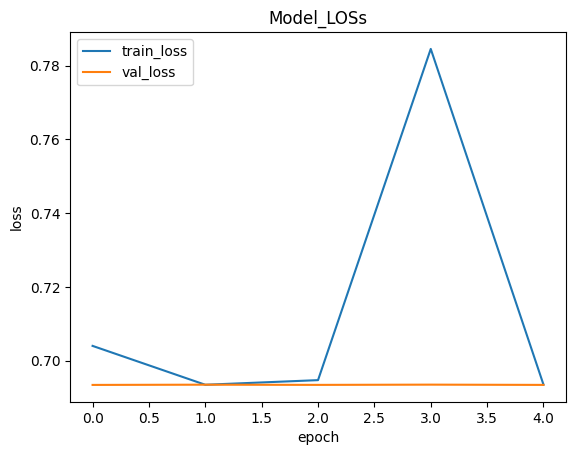

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_LOSs')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'])
plt.show()

In [87]:
model.evaluate(test_dataset)

87/87 [==============================] - 62s 562ms/step - loss: 0.6931 - accuracy: 0.5049


[0.6931172609329224, 0.5048966407775879]

In [89]:
model.predict(test_dataset.take(1))[0][0]

1/1 [==============================] - 18s 18s/step


0.49211425

In [90]:
def prdict_dig(x):
  if(x<0.5):
    return str('P')
  else:
    return str('U')

1/1 [==============================] - 0s 50ms/step


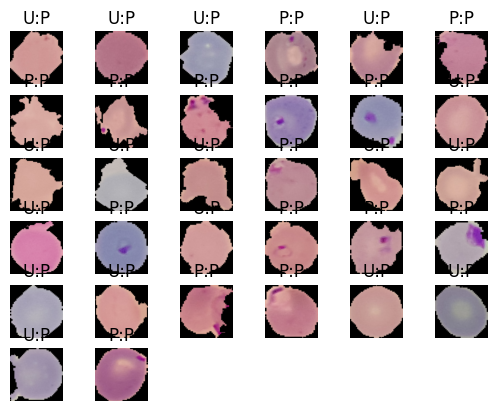

In [128]:
FD=["P","U"]
for i,(value,po) in enumerate(test_dataset.take(1)):
  for i in range(value.shape[0]):
    ax=plt.subplot(6,6,i+1)
    plt.imshow(value[i])
    plt.title(str(FD[po.numpy()[i]])+":"+str(prdict_dig(model.predict(tf.expand_dims(value[i], axis=0))[0][0])))
    plt.axis('off')
  break;

Loading and Saving Models to Google Drive




In [125]:
# 1) Save whole model
# two formats: SavedModel or HDF5
#model.save("nn")  # no file ending = SavedModel
model.save("Malaria.h5")  # .h5 = HDF5

#new_model = tf.keras.models.load_model("nn.h5")



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# 2) save only weights
model.save_weights("nn_weights.h5")

# initilaize model first:
# model = keras.Sequential([...])
model.load_weights("nn_weights.h5")

# 3) save only architecture, to_json
json_string = model.to_json()

with open("nn_model.json", "w") as f:
    f.write(json_string)

with open("nn_model.json", "r") as f:
    loaded_json_string = f.read()

new_model = keras.models.model_from_json(loaded_json_string)
print(new_model.summary())